<a href="https://colab.research.google.com/github/hardik-menger/Music-composition-using-LSTM/blob/main/multiple_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from music21 import converter, instrument, note, chord
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DATA_PATH = "/content/drive/My Drive/new-dataset"

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pickle

# scores=[converter.parse(score) for score in glob.glob("/content/drive/My Drive/data/*.mid")]
# print(len(scores))
# def isMonophonic(stream):
#     try:
#         length = len(instrument.partitionByInstrument(stream).parts)
#     except:
#         length = 0
#     return length == 1
# def toMonophonic(stream):
#   if(isMonophonic(stream)): 
#     notes_to_parse = instrument.partitionByInstrument(stream).parts.parts[0].recurse()
#   else: # file has notes in a flat structure
#     notes_to_parse = stream.flat.notes
#   return notes_to_parse

# def to_C(score):s
#   majors = dict([("A-", 4),("A", 3),("B-", 2),("B", 1),("C", 0),("D-", -1),("D", -2),("E-", -3),("E", -4),("F", -5),("G-", 6),("G", 5),("F#", 6),("C#", -1)])
#   minors = dict([("A-", 1),("A", 0),("B-", -1),("B", -2),("C", -3),("D-", -4),("D", -5),("E-", 6),("E", 5),("F", 4),("G-", 3),("G", 2),("F#", 3),("C#", -4)])
#   key = score.analyze('key')
#   if key.mode == "major":
#         halfSteps = majors[key.tonic.name]
#   elif key.mode == "minor":
#         halfSteps = minors[key.tonic.name]
#   newscore = score.transpose(halfSteps)
#   key = newscore.analyze('key')
#   return newscore


# scores=[toMonophonic(score) for score in scores]

# scores=[to_C(score) for score in scores]


# with open('drive/My Drive/data/scores.pickle', 'wb') as f:
#   pickle.dump(all_chords, f)

In [ ]:
# all_chords = [[] for _ in scores]
# all_durations = [[] for _ in scores]
# all_keys = []


# # # Extract notes, chords, durations, and keys
# for i, song in enumerate(scores):
#     all_keys.append(str(song.analyze('key')))
#     for element in song:
#         if isinstance(element, note.Note):
#             all_chords[i].append(str(element.pitch))
#             all_durations[i].append(element.duration.quarterLength)
#         elif isinstance(element, chord.Chord):
#             all_chords[i].append('.'.join(str(n) for n in sorted(element.normalOrder)))
#             all_durations[i].append(element.duration.quarterLength)

# with open('drive/My Drive/new-dataset/chords2.pickle', 'wb') as f:
#   pickle.dump(all_chords, f)
# with open('drive/My Drive/new-dataset/durations2.pickle', 'wb') as f:
#   pickle.dump(all_durations, f)
# with open('drive/My Drive/new-dataset/keys2.pickle', 'wb') as f:
#   pickle.dump(all_keys, f)




In [ ]:
# len(all_chords)

In [ ]:
#how to load
import pickle
with open('drive/My Drive/data/chords.pickle', 'rb') as f:
  all_chords = pickle.load(f)
with open('drive/My Drive/data/durations.pickle', 'rb') as f:
  all_durations = pickle.load(f)
with open('drive/My Drive/data/keys.pickle', 'rb') as f:
  all_keys = pickle.load(f)
len(all_chords)

498

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{'G4': 14649, 'D4': 13226, 'G3': 11650, 'B2': 3086, 'G2': 3176, 'E4': 16107, 'C4': 15314, 'C3': 7631, 'C2': 992, 'B1': 305, 'D3': 6400, 'D2': 961, 'E3': 9360, 'E2': 1512, 'A4': 12292, 'F4': 7911, 'F3': 6487, 'F2': 1328, 'A2': 3937, 'B3': 10027, 'A3': 11567, 'F#4': 2562, 'C5': 12461, 'B-4': 894, 'C#3': 497, 'F#3': 1873, 'D5': 8869, 'B4': 9317, 'G#4': 1883, 'E-4': 444, 'G#3': 1598, 'E-3': 332, 'G#2': 366, 'C#4': 900, 'E5': 8138, 'B-3': 991, 'B-2': 228, 'G5': 4041, 'F5': 4310, 'A5': 2198, 'F#5': 815, 'G#5': 258, 'D#4': 5, 'C6': 986, 'B5': 1081, 'F#2': 351, 'D6': 402, 'G6': 31, 'F#6': 6, 'E6': 159, 'E-5': 205, 'C#5': 558, '4.8': 38, 'E-2': 41, '1.4': 29, 'B-5': 234, '4.9': 98, '2.11': 418, 'C#2': 44, 'F6': 48, 'A6': 11, '0.4': 748, '2.5': 483, '5.9': 271, '4.7': 677, '9': 30, '2.7.11': 143, '0.4.7': 380, '7.11': 235, '2.6': 37, '0.7': 317, '5': 4, '2': 14, '0.9': 416, '4.11': 67, '0.4.9': 68, '2.7': 342, '6.9': 65, '11': 16, '2.9': 114, '0.5.9': 31, '2.5.11': 44, '7': 79, '0': 76, '5.11': 

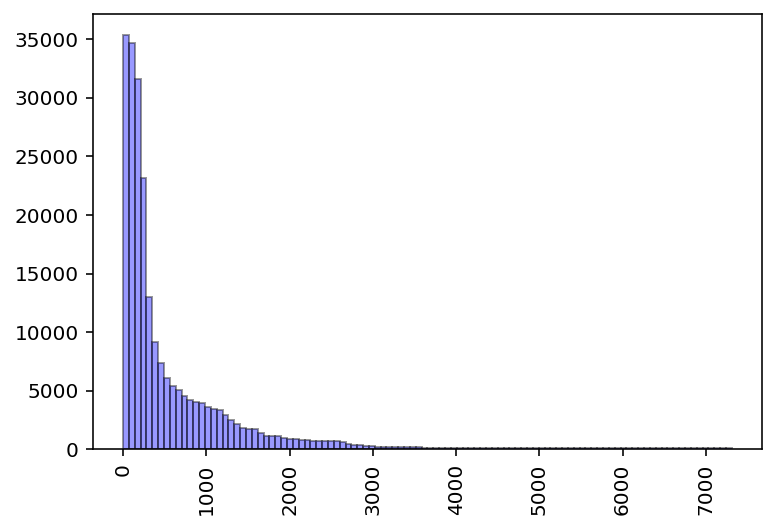

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
notesindex=[i for s in all_chords for i,c in enumerate(s)]
notes=[c for s in all_chords for i,c in enumerate(s)]
freq = {} 
for item in notes: 
    if (item in freq): 
        freq[item] += 1
    else: 
        freq[item] = 1

print(freq)

chart = sns.distplot(notesindex, hist=True, kde=False, 
             bins=104, color = 'blue',hist_kws={'edgecolor':'black'})

for item in chart.get_xticklabels():
    item.set_rotation(90)


In [ ]:
import numpy as np
# Map unique chords to integers

# loop for detecting unique chords
unique_chords = sorted(np.unique([i for s in all_chords for i in s]))
chordToInt = dict((note, number) for number, note in enumerate(unique_chords))

# Map unique durations to integers
unique_durations = np.unique([i for s in all_durations for i in s])
durationToInt = dict((duration, number) for number, duration in enumerate(unique_durations))

# Print number of unique notes and chords
n_vocab=len(unique_chords)
n_durations=len(unique_durations)

print(n_vocab)
print(n_durations)


# Invert chord and duration dictionaries
intToChord = {i: c for c, i in chordToInt.items()}
intToDuration = {i: c for c, i in durationToInt.items()}

184
64


In [ ]:
from keras.utils import np_utils


train_chords = []
train_durations = []
target_chords = []
target_durations = []
sequenceLength=64
# Construct train and target sequences for chords and durations
for s in range(len(all_chords)):
    chordList = [chordToInt[c] for c in all_chords[s]]
    durationList = [durationToInt[d] for d in all_durations[s]]
    
    for i in range(len(chordList) - sequenceLength):
        train_chords.append(chordList[i:i+sequenceLength])
        train_durations.append(durationList[i:i+sequenceLength])
        target_chords.append(chordList[sequenceLength+i])
        target_durations.append(durationList[sequenceLength+i])
train_chords=np.array(train_chords)
train_durations=np.array(train_durations)
target_chords=np.array(target_chords)
target_chords= np_utils.to_categorical(target_chords)

target_durations=np.array(target_durations)
target_durations= np_utils.to_categorical(target_durations)


print(len(train_chords))
# trainChords = np.reshape(trainChords, (len(trainChords), sequenceLength, 1))
# trainDurations = np.reshape(trainDurations, (len(trainDurations), sequenceLength, 1))


Using TensorFlow backend.


201006


In [ ]:
# Define number of samples, notes and chords, and durations
n_samples = train_chords.shape[0]
embedDim = 64

print((n_samples,n_durations,n_vocab))

import keras
import tensorflow as tf
!pip install livelossplot
from livelossplot import PlotLossesKeras
print(tf.__version__)

print(keras.__version__)

(201006, 64, 184)
1.15.2
2.3.1


In [ ]:
!pip install keras_self_attention
# !pip install tensorflow==1.15
# print(tf.__version__)
# print(keras.__version__)

  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=7f2c6a04bc1ef42d33d28a361b49321ec77bf65abc49336b82cf692472517fdb
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


In [ ]:

import tensorflow as tf
from keras.layers import Bidirectional,Dense,Dropout,BatchNormalization,CuDNNLSTM,Activation,Embedding,TimeDistributed,Flatten,LSTM,Input,Concatenate
from keras.models import Model
from keras.regularizers import l2
from keras_self_attention import SeqSelfAttention
from keras.optimizers import Adam, RMSprop, SGD


#### IS TRAINING should be set to false in production

# Define input layers
chordInput =Input(shape = [None,])
durationInput =Input(shape = [None,])


# Define embedding layers
chordEmbedding =Embedding(n_vocab, embedDim, input_length = sequenceLength)(chordInput)
durationEmbedding =Embedding(n_durations, embedDim, input_length = sequenceLength)(durationInput)

# Merge embedding layers using a concatenation layer
mergeLayer =Concatenate(axis=2)([chordEmbedding, durationEmbedding])
print(mergeLayer.shape)
# Define LSTM layer
lstmLayer =Bidirectional(CuDNNLSTM(256, return_sequences=True ))(mergeLayer)
lstmLayer =Dropout(0.2, noise_shape=None, seed=None)(lstmLayer)
lstmLayer =SeqSelfAttention(attention_activation='sigmoid')(lstmLayer)
print(lstmLayer)

lstmLayer =CuDNNLSTM(256)(lstmLayer)
lstmLayer =Dropout(0.2, noise_shape=None, seed=None)(lstmLayer)


# Define dense layer
denseLayer =Dense(256)(lstmLayer)

# Define output layers
chordOutput =Dense(n_vocab, activation = 'softmax')(denseLayer)
durationOutput =Dense(n_durations, activation = 'softmax')(denseLayer)

# Define model
lstm =Model(inputs = [chordInput, durationInput], outputs = [chordOutput, durationOutput])

lstm.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(?, ?, 128)
Tensor("seq_self_attention_1/MatMul_3:0", shape=(?, ?, 512), dtype=float32)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 64, 64)       11776       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding

In [ ]:
#callback for realtime graphs
from keras.callbacks import CSVLogger
csv_logger = CSVLogger("multiple_features_newdata_model_history_log.csv")

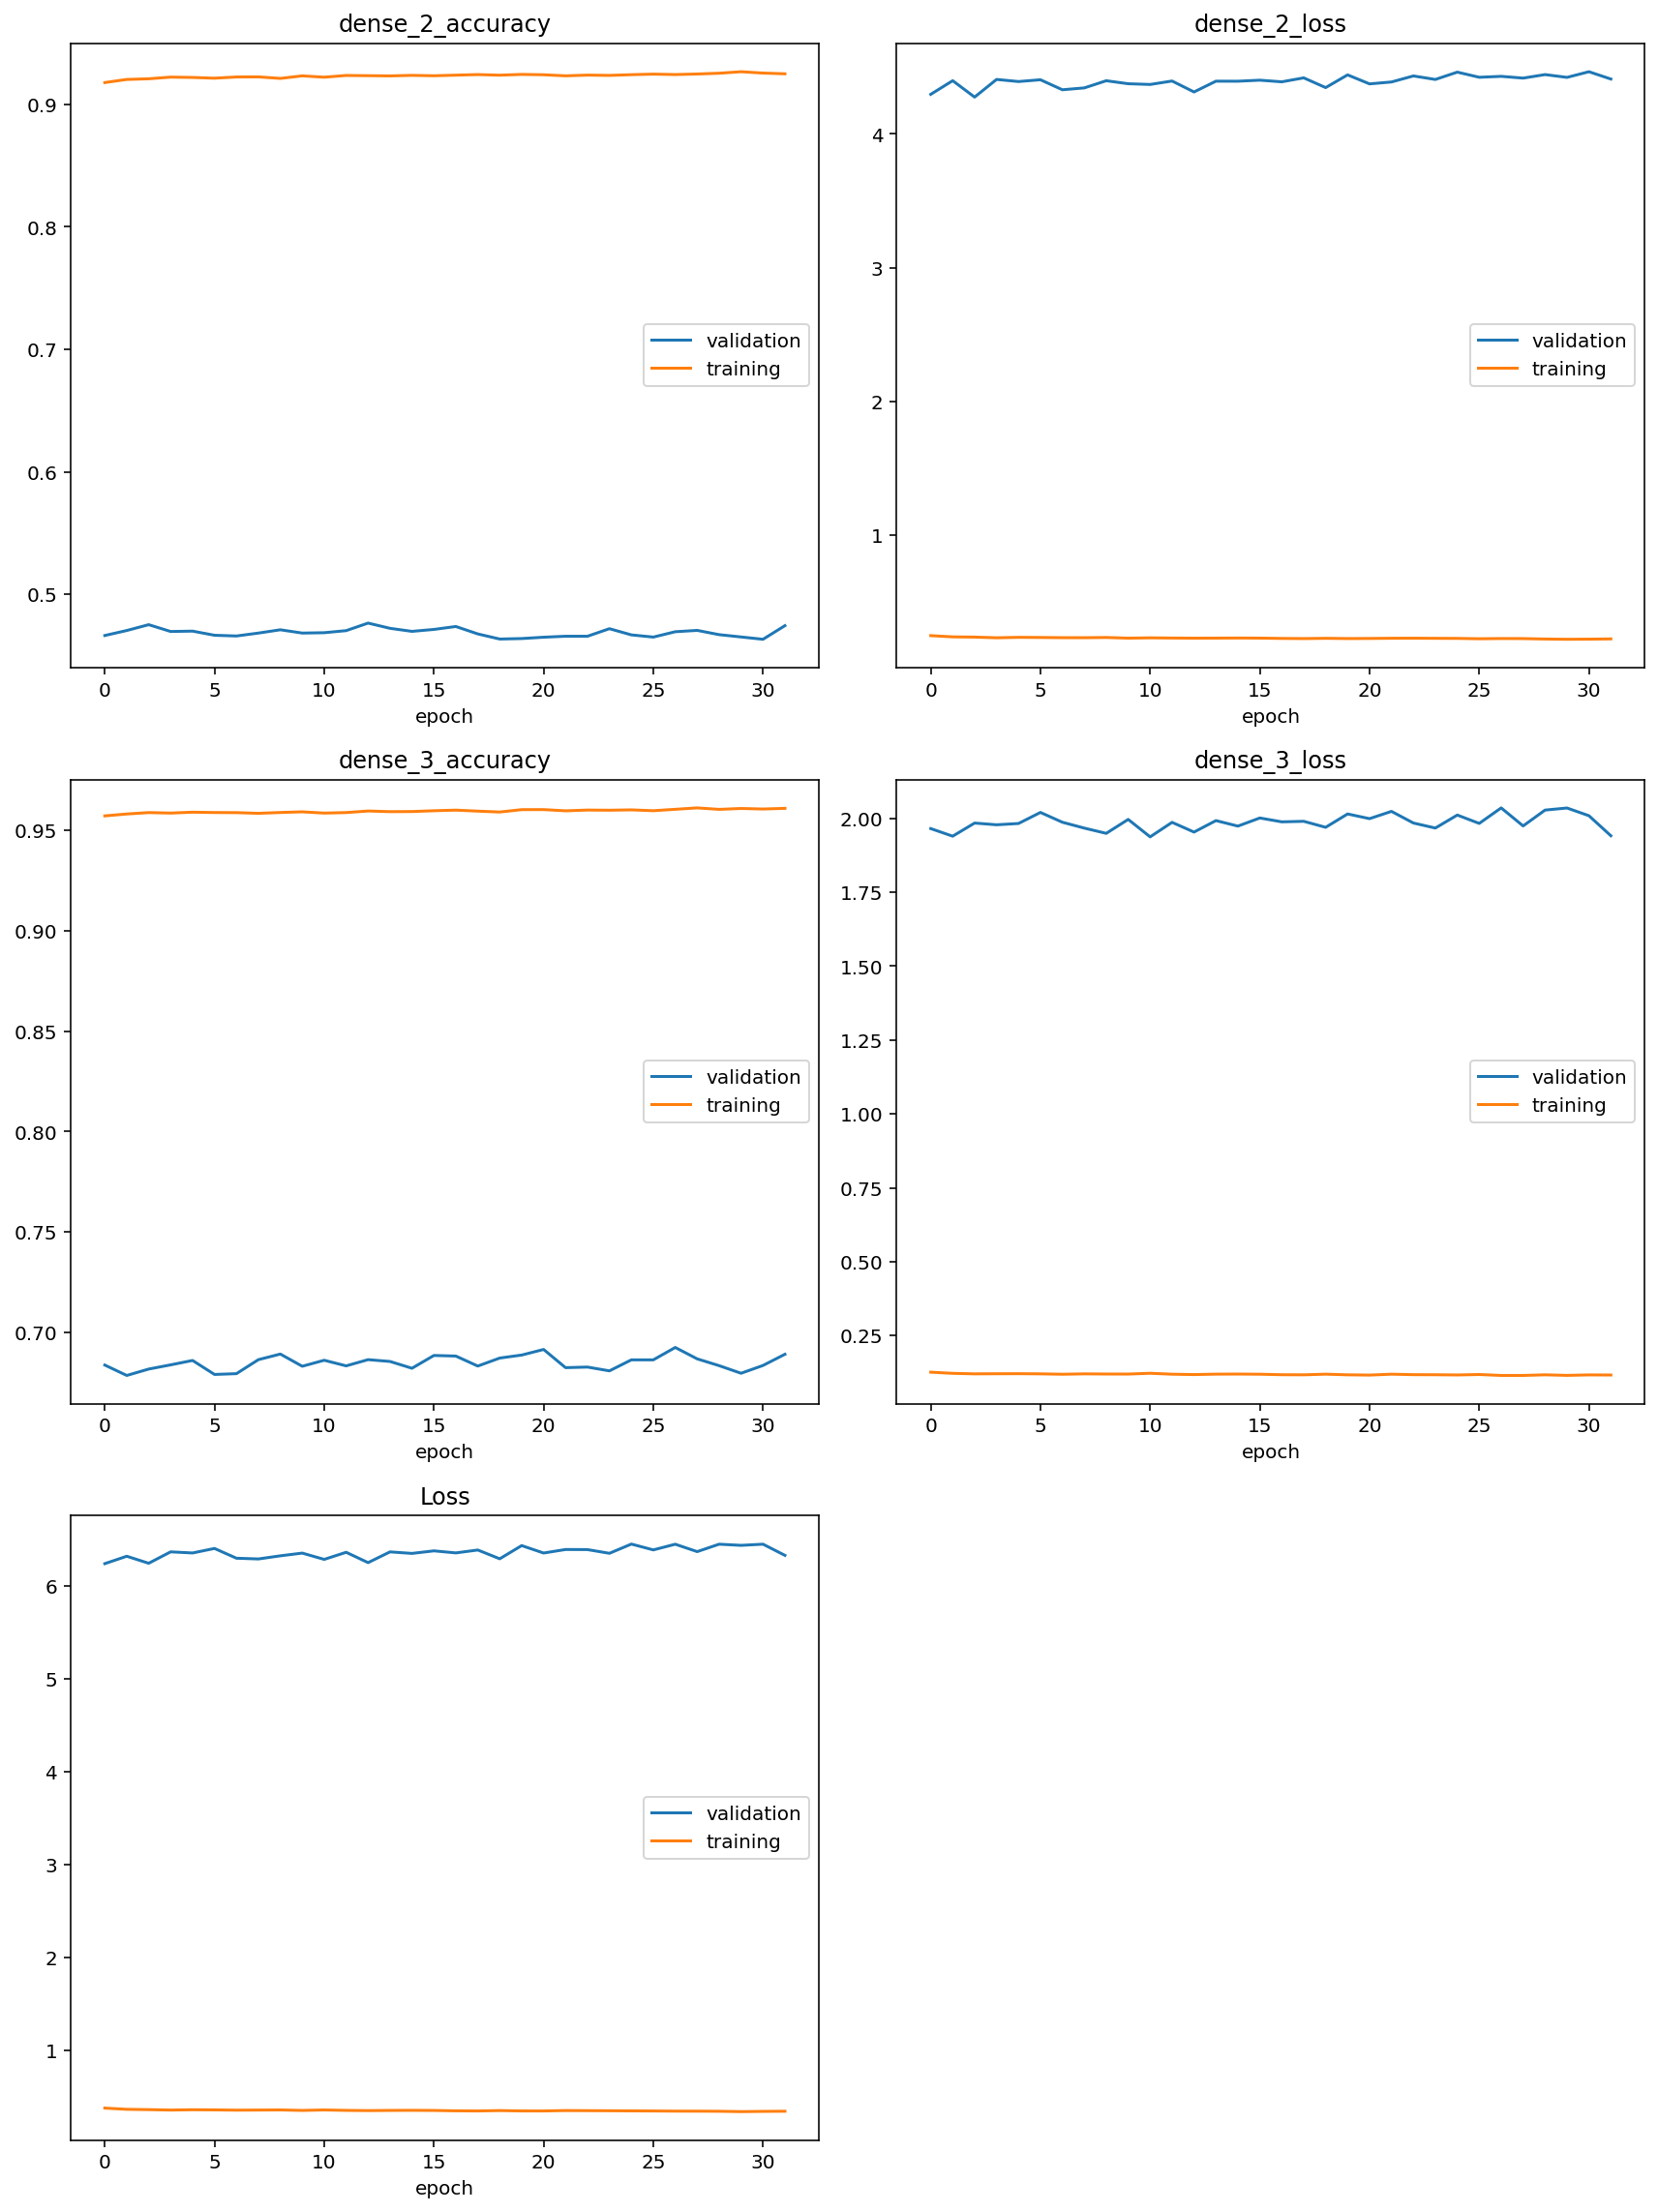

dense_2_accuracy
	validation       	 (min:    0.463, max:    0.476, cur:    0.474)
	training         	 (min:    0.918, max:    0.927, cur:    0.925)
dense_2_loss
	validation       	 (min:    4.275, max:    4.465, cur:    4.410)
	training         	 (min:    0.224, max:    0.252, cur:    0.227)
dense_3_accuracy
	validation       	 (min:    0.679, max:    0.693, cur:    0.689)
	training         	 (min:    0.957, max:    0.961, cur:    0.961)
dense_3_loss
	validation       	 (min:    1.938, max:    2.036, cur:    1.941)
	training         	 (min:    0.115, max:    0.126, cur:    0.116)
Loss
	validation       	 (min:    6.241, max:    6.452, cur:    6.330)
	training         	 (min:    0.339, max:    0.378, cur:    0.344)
Epoch 33/700
 20480/190955 [==>...........................] - ETA: 31s - loss: 0.2742 - dense_2_loss: 0.1889 - dense_3_loss: 0.0853 - dense_2_accuracy: 0.9364 - dense_3_accuracy: 0.9698

In [ ]:
# Train implementing callbacks
%tensorflow_version 1.x
import keras
from keras.models import load_model 
from keras.models import Model

LR = 0.001


lstm.load_weights('/content/drive/My Drive/data/multiple-lstm-73-0.3592-model.hdf5')

# Implementing callbacks to save model after each epoch, just in case not used by now cholo
savepath = "/content/drive/My Drive/data/data-2ultiple-lstm-2-{epoch:02d}-{loss:.4f}-model.hdf5"    
checkpoint = keras.callbacks.ModelCheckpoint(
    savepath, monitor='loss', 
    verbose=0,        
    save_best_only=True,        
    mode='min'
)

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=1)    


#callbacks_list = [checkpoint]

callbacks_list = [checkpoint,csv_logger,PlotLossesKeras()]  

# Compile the model
lstm.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=LR) ,metrics=['accuracy'])
# Train the model

print(np.shape(train_chords), np.shape(train_durations))
history = lstm.fit([train_chords, train_durations], [target_chords, target_durations],
            epochs=700, batch_size=512,validation_split=0.05,shuffle=False, callbacks=callbacks_list)
scores = lstm.evaluate([train_chords, train_durations], [target_chords, target_durations])

lstm.save('multiple-features-2-lstm.h5')


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# from keras.models import load_model 

# lstm.load_weights('/content/drive/My Drive/data/multiple-lstm-03-4.4091-model.hdf5')


In [ ]:
start = 111111

initialChords = np.expand_dims(train_chords[start,:].copy(), 0)
initialDurations = np.expand_dims(train_durations[start,:].copy(), 0)

def predict(chordSequence, durationSequence):
    predictedChords, predictedDurations = lstm.predict([chordSequence, durationSequence])
    return np.argmax(predictedChords), np.argmax(predictedDurations)

# Define empty lists for generated chords and durations
newChords, newDurations = [], []

# Generate chords and durations using 500 rounds of prediction
for j in range(500):
    newChord, newDuration = predict(initialChords, initialDurations)
    
    newChords.append(newChord)
    newDurations.append(newDuration)
    #[0 to n]=[1 to n,null]
    initialChords[0][:-1] = initialChords[0][1:]
    initialChords[0][-1] = newChord
    initialDurations[0][:-1] = initialDurations[0][1:]
    initialDurations[0][-1] = newDuration

print(newChords ,newDurations)

In [ ]:
from music21 import stream
generatedStream = stream.Stream()
generatedStream.append(instrument.Piano())
for i in range(len(newChords)):
    # pattern is a chord
    newchord= intToChord[newChords[i]]
    newduration =intToDuration[newDurations[i]]
    try:
        new_note = note.Note(newchord)
        new_note.storedInstrument = instrument.Piano()
        new_note.quarterLength = newduration
        generatedStream.append(new_note)
        
    except:
        notes_in_chord = newchord.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.quarterLength = newduration
        generatedStream.append(new_chord)
generatedStream.write('midi', fp='original.mid')
from google.colab import files
files.download('original.mid') 

In [ ]:
# import glob
# from music21 import converter, instrument, note, chord
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# import pickle

# scores=[converter.parse(score) for score in glob.glob("/content/drive/My Drive/BE Project/Multiple Features.mid")]
# print(len(scores))
# def isMonophonic(stream):
#     try:
#         length = len(instrument.partitionByInstrument(stream).parts)
#     except:
#         length = 0
#     return length == 1
# def toMonophonic(stream):
#   if(isMonophonic(stream)): 
#     notes_to_parse = instrument.partitionByInstrument(stream).parts.parts[0].recurse()
#   else: # file has notes in a flat structure
#     notes_to_parse = stream.flat.notes
#   return notes_to_parse

# def to_C(score):
#   majors = dict([("A-", 4),("A", 3),("B-", 2),("B", 1),("C", 0),("D-", -1),("D", -2),("E-", -3),("E", -4),("F", -5),("G-", 6),("G", 5),("F#", 6),("C#", -1)])
#   minors = dict([("A-", 1),("A", 0),("B-", -1),("B", -2),("C", -3),("D-", -4),("D", -5),("E-", 6),("E", 5),("F", 4),("G-", 3),("G", 2),("F#", 3),("C#", -4)])
#   key = score.analyze('key')
#   if key.mode == "major":
#         halfSteps = majors[key.tonic.name]
#   elif key.mode == "minor":
#         halfSteps = minors[key.tonic.name]
#   newscore = score.transpose(halfSteps)
#   key = newscore.analyze('key')
#   return newscore


# scores=[toMonophonic(score) for score in scores]

# scores=[to_C(score) for score in scores]

# all_chords = [[] for _ in scores]
# all_durations = [[] for _ in scores]
# all_keys = []

# # # Extract notes, chords, durations, and keys
# for i, song in enumerate(scores):
#     all_keys.append(str(song.analyze('key')))
#     for element in song:
#         if isinstance(element, note.Note):
#             all_chords[i].append(str(element.pitch))
#             all_durations[i].append(element.duration.quarterLength)
#         elif isinstance(element, chord.Chord):
#             all_chords[i].append('.'.join(str(n) for n in sorted(element.normalOrder)))
#             all_durations[i].append(element.duration.quarterLength)


# notes = all_chords[0]
# durations = all_durations[0]

# print(notes)
# print(durations)


import numpy as np;


def to_dorian(pred_out): 
  new_pred=to_minor(pred_out)

  res = [sub.replace('G#','A') for sub in new_pred]
  return res

def to_phrygian(pred_out): 
  new_pred=to_minor(pred_out)
  
  res = [sub.replace('D','C#') for sub in new_pred]
  return res

def to_minor(pred_out): 
  
  res = [sub.replace('E','E-') for sub in pred_out]
  res = [sub.replace('A','G#') for sub in res]
  res = [sub.replace('B','B-') for sub in res]
  return res

def to_lydian(pred_out):
       
  res = [sub.replace('F','F#') for sub in pred_out]
  return res
   
def to_myxolydian(pred_out):

    new_pred=to_minor(pred_out)
    res = [sub.replace('E-','E') for sub in res]
    return res


# newChords=[intToChord[n] for n in newChords]


chords=to_minor([intToChord[n] for n in newChords])
print([intToChord[n] for n in newChords])
print(chords)

# dorian=to_dorian(newChords)
# phrygian=to_phrygian(newChords)
# lydian=to_lydian(newChords)

# newChords=[chordToInt[n] for n in newChords]

from music21 import stream
generatedStream = stream.Stream()
generatedStream.append(instrument.Piano())
for i in range(len(chords)):
    # pattern is a chord
    newchord=chords[i]
    newduration = intToDuration[ newDurations[i]]
    try:
        new_note = note.Note(newchord)
        new_note.storedInstrument = instrument.Piano()
        new_note.quarterLength = newduration
        generatedStream.append(new_note)
        
    except:
        notes_in_chord = newchord.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.quarterLength = newduration
        generatedStream.append(new_chord)
generatedStream.write('midi', fp='modal.mid')
from google.colab import files
files.download('modal.mid') 